In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print(sys.executable)

vgg_train_data_MBTI = np.load("vgg\\original\\train_data_MBTI.npy")
vgg_test_data_MBTI = np.load("vgg\\original\\test_data_MBTI.npy")
vgg_train_label_MBTI = np.load("vgg\\original\\train_label_MBTI.npy")
vgg_test_label_MBTI = np.load("vgg\\original\\test_label_MBTI.npy")

vgg_test_data = np.load("vgg\\test\\test_data_MBTI.npy")
vgg_test_label = np.load("vgg\\test\\test_label_MBTI.npy")

inception_train_data_MBTI = np.load("inception\\original\\train_data_MBTI.npy")
inception_test_data_MBTI = np.load("inception\\original\\test_data_MBTI.npy")
inception_train_label_MBTI = np.load("inception\\original\\train_label_MBTI.npy")
inception_test_label_MBTI = np.load("inception\\original\\test_label_MBTI.npy")

inception_test_data = np.load("inception\\test\\test_data_MBTI.npy")
inception_test_label = np.load("inception\\test\\test_label_MBTI.npy")

C:\Users\leeh9\anaconda3\envs\ugrp_3\python.exe


In [43]:
def overlap(string1, string2):
    count = 0
    for i in range(min(len(string1), len(string2))):
        if string1[i] == string2[i]:
            count = count + 1
    return count

In [49]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Logistic Regression", 
         "Linear Discriminant Analysis", "Quadratic Discriminant Analysis"]

personality = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP',
                'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']
         
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

log_cols = ["Classifier", "Accuracy", "Model"]
log = pd.DataFrame(columns=log_cols)
log_2 = pd.DataFrame(columns=log_cols)
test_vgg_log = pd.DataFrame(columns=log_cols)
test_inception_log = pd.DataFrame(columns=log_cols)

MBTI_cols = ['Classifier', 'Model', 'Haeun', 'Jong Yeop', 'Jun Hyeong', 'Hyunju', 'Byungjun']
MBTI = pd.DataFrame(columns=MBTI_cols)
MBTI_entry = pd.DataFrame([['Answer', 'None', personality[vgg_test_label[0]], personality[vgg_test_label[1]], personality[vgg_test_label[2]], personality[vgg_test_label[3]], personality[vgg_test_label[4]]]], columns=MBTI_cols)
MBTI = MBTI.append(MBTI_entry, ignore_index=True)

vgg_test_answer = []
inception_test_answer = []
for i in range(5):
    vgg_test_answer.append(vgg_test_label[i])
    inception_test_answer.append(inception_test_label[i])

                         Classifier  Accuracy              Model
0                 Nearest Neighbors      0.50                VGG
1                 Nearest Neighbors      0.75  InceptionResNetV2
2                        Linear SVM      0.65                VGG
3                        Linear SVM      0.65  InceptionResNetV2
4                           RBF SVM      0.70                VGG
5                           RBF SVM      0.70  InceptionResNetV2
6                     Decision Tree      0.65                VGG
7                     Decision Tree      0.55  InceptionResNetV2
8                     Random Forest      0.65                VGG
9                     Random Forest      0.70  InceptionResNetV2
10                         AdaBoost      0.60                VGG
11                         AdaBoost      0.35  InceptionResNetV2
12                      Naive Bayes      0.75                VGG
13                      Naive Bayes      0.75  InceptionResNetV2
14              Logistic 

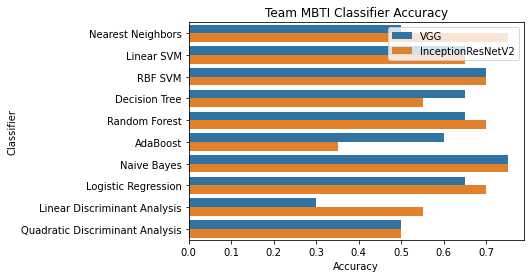

In [50]:
########################################
#   Our face test with trained model   #
########################################

import dataframe_image as dfi

for i in range(0, len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(vgg_train_data_MBTI, vgg_train_label_MBTI)
    vgg_test_result = classifier.predict(vgg_test_data)
    classifier.fit(inception_train_data_MBTI, inception_train_label_MBTI)
    inception_test_result = classifier.predict(inception_test_data)

    vgg_accuracy = 0
    inception_accuracy = 0
    for j in range(5):
        vgg_accuracy = vgg_accuracy + overlap(personality[vgg_test_result[j]], personality[vgg_test_answer[j]])
        inception_accuracy = inception_accuracy + overlap(personality[inception_test_result[j]], personality[inception_test_answer[j]])

    MBTI_entry = pd.DataFrame([[names[i], "VGG", personality[vgg_test_result[0]], personality[vgg_test_result[1]], personality[vgg_test_result[2]], personality[vgg_test_result[3]], personality[vgg_test_result[4]]]], columns=MBTI_cols)
    MBTI = MBTI.append(MBTI_entry, ignore_index=True)
    MBTI_entry = pd.DataFrame([[names[i], "InceptionResNetV2", personality[inception_test_result[0]], personality[inception_test_result[1]], personality[inception_test_result[2]], personality[inception_test_result[3]], personality[inception_test_result[4]]]], columns=MBTI_cols)
    MBTI = MBTI.append(MBTI_entry, ignore_index=True)
    
    vgg_accuracy = vgg_accuracy / 20
    inception_accuracy = inception_accuracy / 20

    vgg_log_entry = pd.DataFrame([[names[i], vgg_accuracy, "VGG"]], columns=log_cols)
    inception_log_entry = pd.DataFrame([[names[i], inception_accuracy, "InceptionResNetV2"]], columns=log_cols)

    log = log.append(vgg_log_entry, ignore_index=True)
    log = log.append(inception_log_entry, ignore_index=True)

print(log)
log_styled = log.style.background_gradient()
dfi.export(log_styled,"test_accuarcy.jpg")

MBTI_styled = MBTI.style.background_gradient()
dfi.export(MBTI_styled,"MBTI_result.jpg")

plt.xlabel('Accuracy')
plt.title('Team MBTI Classifier Accuracy')
ax = sns.barplot(x='Accuracy', y='Classifier', hue='Model', data=log)
ax.legend(loc='upper right')
ax.figure.savefig("test_result.jpg", bbox_inches='tight')  
plt.show()

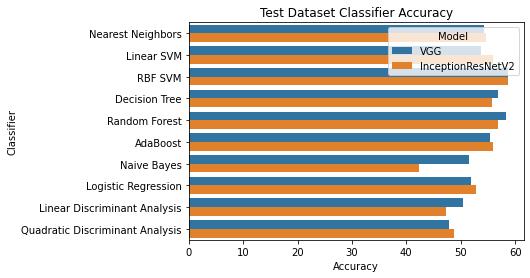

In [45]:
##################################################
#     Trained model test with test data set      #
##################################################

for i in range(0, len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(vgg_train_data_MBTI, vgg_train_label_MBTI)
    vgg_test_result = classifier.predict(vgg_test_data_MBTI)
    classifier.fit(inception_train_data_MBTI, inception_train_label_MBTI)
    inception_test_result = classifier.predict(inception_test_data_MBTI)

    vgg_accuracy = 0
    inception_accuracy = 0
    for j in range(vgg_test_data_MBTI.shape[0]):
        vgg_accuracy = vgg_accuracy + overlap(personality[vgg_test_result[j]], personality[vgg_test_label_MBTI[j]])
        inception_accuracy = inception_accuracy + overlap(personality[inception_test_result[j]], personality[inception_test_label_MBTI[j]])
    
    vgg_accuracy = vgg_accuracy / 20
    inception_accuracy = inception_accuracy / 20

    vgg_log_entry = pd.DataFrame([[names[i], vgg_accuracy, "VGG"]], columns=log_cols)
    inception_log_entry = pd.DataFrame([[names[i], inception_accuracy, "InceptionResNetV2"]], columns=log_cols)

    log_2 = log_2.append(vgg_log_entry, ignore_index=True)
    log_2 = log_2.append(inception_log_entry, ignore_index=True)

log_styled = log_2.style.background_gradient()
dfi.export(log_styled,"test_accuarcy_2.jpg")

plt.xlabel('Accuracy')
plt.title('Test Dataset Classifier Accuracy')
ax = sns.barplot(x='Accuracy', y='Classifier', hue='Model', data=log_2)
ax.figure.savefig("test_data_result.jpg", bbox_inches='tight')  
plt.show()

                         Classifier  Accuracy  \
0                 Nearest Neighbors  0.128319   
1                        Linear SVM  0.150442   
2                           RBF SVM  0.181416   
3                     Decision Tree  0.148230   
4                     Random Forest  0.159292   
5                          AdaBoost  0.139381   
6                       Naive Bayes  0.132743   
7               Logistic Regression  0.130531   
8      Linear Discriminant Analysis  0.079646   
9   Quadratic Discriminant Analysis  0.068584   
10                Nearest Neighbors  0.120956   
11                       Linear SVM  0.109191   
12                          RBF SVM  0.180882   
13                    Decision Tree  0.162132   
14                    Random Forest  0.163235   
15                         AdaBoost  0.156985   
16                      Naive Bayes  0.100000   
17              Logistic Regression  0.123162   
18     Linear Discriminant Analysis  0.123529   
19  Quadratic Discri

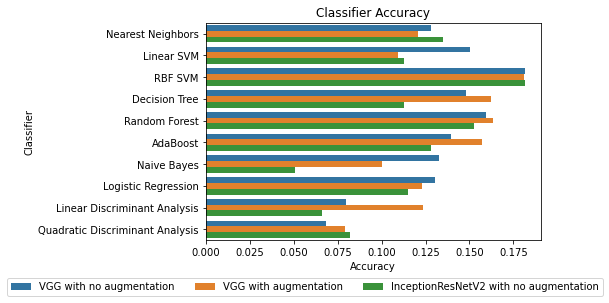

In [42]:
# NEED TO BE FIXED
# Doesn't match above

option_1 = ['VGG with no augmentation'] * 10
option_2 = ['VGG with augmentation'] * 10
option_3 = ['InceptionResNetV2 with no augmentation'] * 10

vgg_original_log['Option'] = option_1
#vgg_augmented_log['Option'] = option_2
inception_log['Option'] = option_3

#n1 = vgg_original_log.append(vgg_augmented_log, ignore_index=True)
df = n1.append(inception_log, ignore_index=True)
print(df)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
#sns.set_color_codes("muted")
ax = sns.barplot(x='Accuracy', y='Classifier', data=df, hue='Option')  
ax.legend(loc='upper right', bbox_to_anchor= (1.2, -0.15), ncol=3)
plt.show()
ax.figure.savefig("output_1.jpg", bbox_inches='tight')
